# Simuler l'évolution de l'épaisseur d'un glacier en fonction de l'augmentation moyenne des températures

/var/folders/ws/6clyqjd11p98_1dym9dkvcxr0000gn/T/ipykernel_4064/4044273806.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


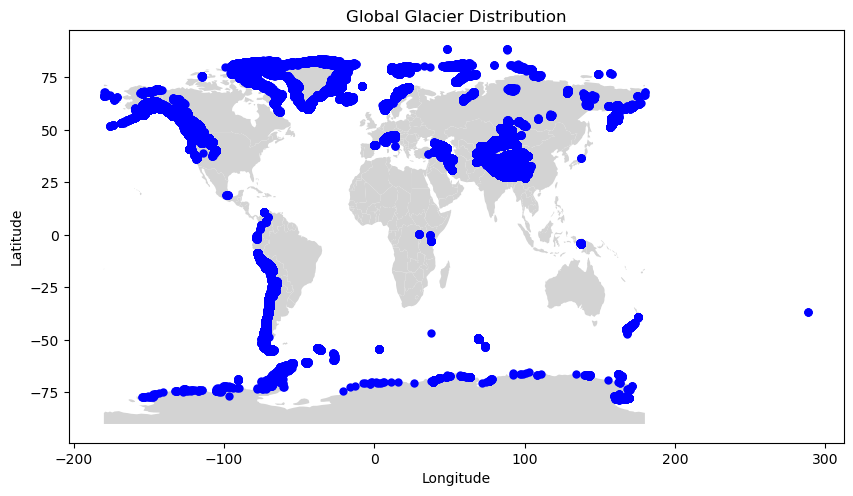

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the glacier data files for the southern and northern hemispheres
glims_data_south_path = '/Users/zhukaiming/Desktop/SMART/smart24-1/glims_points.shp'  # Replace with the actual path to the glacier data file for the southern hemisphere
glims_data_north_path = '/Users/zhukaiming/Desktop/SMART/smart24-1/glims_pointsn.shp'  # Replace with the actual path to the glacier data file for the northern hemisphere

# Read the glacier data for the southern and northern hemispheres
glims_data_south = gpd.read_file(glims_data_south_path)
glims_data_north = gpd.read_file(glims_data_north_path)

# Create a map and plot the global glacier distribution
fig, ax = plt.subplots(figsize=(10, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey')

# Plot the glacier data for the southern and northern hemispheres
glims_data_south.plot(ax=ax, color='blue', linewidth=0.001)
glims_data_north.plot(ax=ax, color='blue', linewidth=0.001)

# Add title and labels
plt.title('Global Glacier Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the map
plt.show()
